## Integrador de primer orden implicito

Esto sería el integrador de Euler implicito, pero veremos si podemos implementarlo generico. Primero plantiemos que situación intentamos resolver.

El problema es resolver es la ecuación diferencial ordinaria de primer orden tal que: $$ \dot{\underline{x}} = f(\underline{x}, t) $$ donde $\underline{x}$ es un vector $\left[x_1, \cdots, x_n \right]^T$.

### Para un sistema lineal

Si suponemos que $f(\underline{x}, t)$ es una función lineal, entonces podemos plantear el problema como $$ \dot{\underline{x}} = \underline{\underline{A}} \cdot \underline{x} $$

Entonces el integrador de Euler implicito plantea que para simular esta ecuación diferencial es con el siguiente paso $$ \underline{x}^{t + 1} = \underline{x}^{t} + \Delta t \cdot \underline{\underline{A}} \cdot \underline{x}^{t + 1} $$ por lo tanto despejando $\underline{x}^{t + 1}$ nos deja con la siguiente ecuación $$ \underline{x}^{t + 1} = \left( \mathbb{I} - \Delta t \cdot \underline{\underline{A}} \right)^{-1} \cdot \underline{x}^{t} $$

Sea $\underline{\underline{B}}(\Delta t) = \mathbb{I} - \Delta t \cdot \underline{\underline{A}}$ dejando la forma de resolverlo como $$ \underline{x}^{t + 1} = \underline{\underline{B}}^{-1}(\Delta t) \cdot \underline{x}^{t}$$

### Para un sistema no lineal

Ahora no podemos suponer nada sobre la función, por lo tanto tenemos el siguiente problema $$ \dot{\underline{x}} = f(\underline{x}, t) $$ 

Entonces el integrador de Euler implicito plantea que para simular esta ecuación diferencial es con el siguiente paso $$ \underline{x}^{t + 1} = \underline{x}^{t} + \Delta t \cdot f\left(\underline{x}^{t + 1}\right) $$

Vamos a suponer que es una unica variable, dejandonos con la ecuación $$ x^{t + 1} = x^{t} + \Delta t \cdot f\left(x^{t + 1}\right) $$ y por lo tanto podemos despejar de la siguiente forma $$ x^{t + 1} - \Delta t \cdot f\left(x^{t + 1}\right) = x^{t} $$

Sea $g(x, \Delta t) = x - \Delta t \cdot f\left(x\right)$ dejando la forma de resolver como
$$ g\left(x^{t + 1}\right) = x^{t} $$
$$ x^{t + 1} = g^{-1}\left(x^{t}\right) $$

In [9]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [10]:
valores_t = np.linspace(0, 5, 1000)
dt = valores_t[1] - valores_t[0]

In [11]:
def FuncionInversa(funcion, punto):
    return sp.optimize.newton(lambda x: funcion(x) - punto, punto)

Anteriormente mencionamos como se podría uusar un método implicito, pero podemos aplicar un método de trapecios, donde se hace un promedio del implicito y el explicito.

$$ x^{t+1} = x^{t} + \frac{\Delta t}{2} \left( f\left(x^{t} \right) + \left(x^{t + 1} \right) \right) $$

resolviendo algebraicamente, nos queda:

$$ x^{t+1} - \frac{\Delta t}{2} f\left(x^{t + 1} \right) = x^{t} + \frac{\Delta t}{2} f\left(x^{t} \right) $$

Sea $g(x, \Delta t) = x - \frac{\Delta t}{2} f\left(x \right)$ dejando la forma de resolver como

$$ g\left(x^{t + 1} \right) = x^{t} + \frac{\Delta t}{2} f\left(x^{t} \right) $$
$$ x^{t + 1} = g^{-1}\left(x^{t} + \frac{\Delta t}{2} f\left(x^{t} \right) \right) $$

Ahora notemos como necesitaremos un método iterativo, por lo que necesitamos un valor inicial. Como tendremos que calcular por separado $f\left(x^{t}\right)$ y usarlo como valor de inicio.

In [12]:
def rk1_implicito(funcion, dt, punto_inicio):
    return FuncionInversa(lambda x: x - dt * funcion(x), punto_inicio)

def rk1_trape(funcion, dt, punto_inicio):
    valor_inicial = punto_inicio + 0.5 * dt * funcion(punto_inicio)
    funcion_intermedia = lambda x: x - 0.5 * dt * funcion(x)
    return FuncionInversa(funcion_intermedia, valor_inicial)

def euler(funcion, dt, punto_inicio):
    return punto_inicio + dt * funcion(punto_inicio)

In [13]:
valor_inicial = 2.0
alfa = -8.75

funcion_iteracion = lambda t: alfa * np.sin(8 * np.cos(t) + 3 * np.sin(t))

In [14]:
valores_implicitos = valores_t * 0
valores_tradicional = valores_t * 0
valores_trap = valores_t * 0

valor_intermedio_implicito = valor_inicial
valor_intermedio_tradicional = valor_inicial
valor_intermedio_trap = valor_inicial

for i in range(len(valores_t)):
    valor_intermedio_implicito = rk1_implicito(funcion_iteracion, dt, valor_intermedio_implicito)
    valores_implicitos[i] = valor_intermedio_implicito

    valor_intermedio_tradicional = euler(funcion_iteracion, dt, valor_intermedio_tradicional)
    valores_tradicional[i] = valor_intermedio_tradicional

    valor_intermedio_trap = rk1_trape(funcion_iteracion, dt, valor_intermedio_trap)
    valores_trap[i] = valor_intermedio_trap

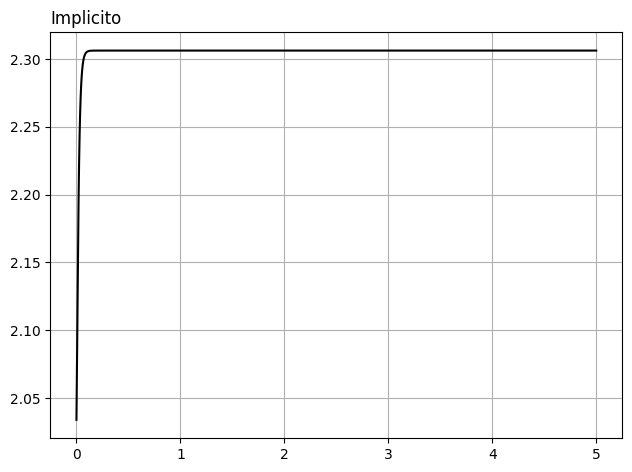

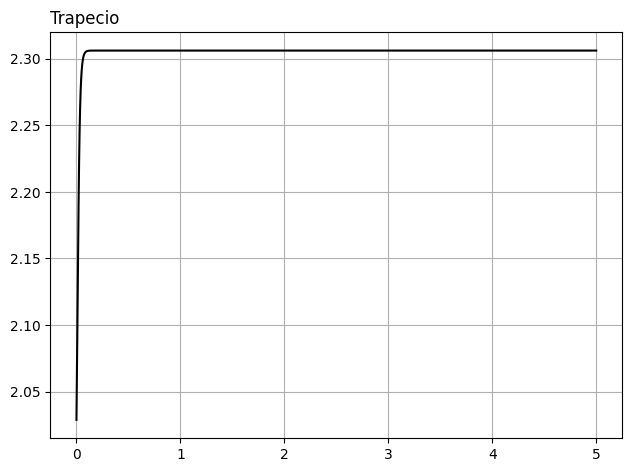

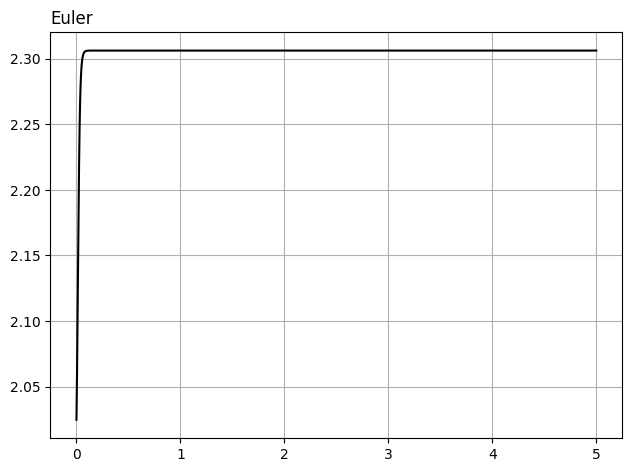

In [15]:
# implicito
plt.figure()

plt.plot(valores_t, valores_implicitos, 'k-')
plt.grid(True)
plt.title('Implicito', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

# trap
plt.figure()

plt.plot(valores_t, valores_trap, 'k-')
plt.grid(True)
plt.title('Trapecio', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()

# tradicional
plt.figure()

plt.plot(valores_t, valores_tradicional, 'k-')
plt.grid(True)
plt.title('Euler', loc = 'left')
plt.tight_layout(pad=1.0)

plt.show()